In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def floatcheck(S):
    try:
        float(S)
        return True
    except ValueError:
        return False
    
def intcheck(S):
    try:
        int(S)
        return True
    except ValueError:
        return False
def Mean(S):
    mean = 0 
    for i in range(len(S)):
        mean += S[i]
    return mean*1/len(S)
   
def autocov(Series, N, k):
    autoCov = 0
    MeanS = Mean(Series)
    for i in np.arange(0, N-k):
        autoCov += ((Series[i+k])-MeanS)*(Series[i]-MeanS)
    return (1/N)*autoCov

def PSD(S):
    n = len(S)
    fft_series = np.fft.fft(S)
    psd =np.abs(fft_series)**2 / n 
    psd_Db = 10*np.log10(psd)
    return psd_Db



    # Only take positive frequencies (first half of the spectrum)
    #freqs = freqs[:n // 2]
    #psd_db = psd_db[:n // 2]


In [2]:
flag = True
N = input('How Many Sinuoids are in this Time Series?')

while flag == True: 
    if intcheck(N) == True :
        flag = False
        break 
    else:
        print('Error Invalid Input, Please input a valid Integer entry')
        N = input('How Many Sinuoids are in this Time Series? ') 
        break
#
SampF = 0.01


flag = True
t0 = input('What is the Starting Time?')
while flag == True: 
    if intcheck(t0) == True or floatcheck(t0) == True:
            flag = False
            break 
    else:
        print('Error Invalid Input, Please input a valid Numeric entry')
        t0 = input('What is the Starting Time?')
        break

#

flag = True
tf = float(input('What is the Final Time?'))
while flag == True: 
    if intcheck(tf) == True or floatcheck(tf) == True:
            flag = False
            break 
    else:
        print('Error Invalid Input, Please input a valid Numeric entry')
        tf = input('What is the Final Time?')
        break
Nval = int(N)
t0Val = float(t0)
tfVal = float(tf)
SampFVal = float(SampF)

itfVal = np.rint((tfVal - t0Val)/SampFVal)

tfVal = t0Val + itfVal*SampFVal

FreqT = input('Do you want Random, Set or Manual frequency')
FreqT = FreqT.capitalize()
FreqT = FreqT.strip()

StdF = []
StdW0 = []
StdA = []

flag = True
CV = 'Null'

while flag == True: 

    if FreqT == 'Set': 
        CV = 'S'
        flag = False
        break
    if FreqT == 'Manual': 
        CV = 'M'
        flag = False
        break
    if FreqT == 'Random': 
        CV = 'R'
        flag = False
        break
    else:
        print('Error Invalid Input, Please input a valid entry (Random,Set or Manual)')
        FreqT = input('Do you want Random, Set or Manual frequency')
        break

for i in range(Nval):
    if CV == 'R':
        StdF.append(np.random.uniform(0,50))
    if CV == 'S':
        StdF.append(10*i + 1)
    if CV == 'M':
        flag = True
        Finput = input(f'What is the {i+1}th Frequency?')
        while flag == True: 
            if intcheck(tf) == True or floatcheck(tf) == True:
                flag = False
                break 
            else:
                print('Error Invalid Input, Please input a valid Numeric entry')
                Finput = input(f'What is the {i+1}th Frequency?')
                break
        StdF.append(float(Finput))
#/////////////////////////////////////////////////////


AmpT = input('Do you want Random, Set or Manual Amplitude')
AmpT = AmpT.capitalize()
AmpT = AmpT.strip()

flag = True
CV = 'Null'

while flag == True: 

    if AmpT == 'Set': 
        CV = 'S'
        flag = False
        break
    if AmpT == 'Manual': 
        CV = 'M'
        flag = False
        break
    if AmpT == 'Random': 
        CV = 'R'
        flag = False
        break
    else:
        print('Error Invalid Input, Please input a valid entry (Random,Set or Manual)')
        AmpT = input('Do you want Random, Set or Manual frequency')
        break

for i in range(Nval):
    if CV == 'R':
        StdA.append(np.random.uniform(0,50))
    if CV == 'S':
        StdA.append(10)
    if CV == 'M':
        flag = True
        Ainput = input(f'What is the {i+1}th Amplitude?')
        while flag == True: 
            if intcheck(tf) == True or floatcheck(tf) == True:
                flag = False
                break 
            else:
                print('Error Invalid Input, Please input a valid Numeric entry')
                Ainput = input(f'What is the {i+1}th Amplitude?')
                break
        StdA.append(float(Ainput))

#/////////////////////////////////////////////////////

PhaT = input('Do you want Random, Set or Manual Phase')
PhaT = PhaT.capitalize()
PhaT = PhaT.strip()

flag = True
CV3 = 'Null'

while flag == True: 

    if PhaT == 'Set': 
        CV3 = 'S'
        flag = False
        break
    if PhaT == 'Manual': 
        CV3 = 'M'
        flag = False
        break
    if PhaT == 'Random': 
        CV3 = 'R'
        flag = False
        break
    else:
        print('Error Invalid Input, Please input a valid entry (Random,Set or Manual)')
        PhaT = input('Do you want Random, Set or Manual Phase')
        break

for i in range(Nval):
    if CV3 == 'R':
        StdW0.append(np.random.uniform(0,50))
    if CV3 == 'S':
        StdW0.append(3.14)
    if CV3 == 'M':
        flag = True
        Winput = input(f'What is the {i+1}th Phase?')
        while flag == True: 
            if intcheck(tf) == True or floatcheck(tf) == True:
                flag = False
                break 
            else:
                print('Error Invalid Input, Please input a valid Numeric entry')
                Winput = input(f'What is the {i+1}th Phase?')
            break
        StdW0.append(float(Winput))

t = np.arange(t0Val, tfVal, SampFVal)  



NoiseC = input('Do you want White Noise')
NoiseC = NoiseC.capitalize()
NoiseC = NoiseC.strip()

flag = True
CV4 = 'Null'

while flag == True: 

    if NoiseC == 'Yes':
        NoiseC2 = input('Do you want Set or Manual White Noise?')
        NoiseC2 = NoiseC2.capitalize()
        NoiseC2 = NoiseC2.strip()
        flag2 = True
        while flag2 == True:
            if NoiseC2 == 'Set':
                CV4 = 'S'
                flag2 = False
                break
            if NoiseC2 == 'Manual':
                CV4 = 'M'
                flag2 = False
                break
            else: 
                print('Invalid Entry')
                NoiseC2 = input('Do you want Set or Manual White Noise?')
                NoiseC2 = NoiseC2.capitalize()
                NoiseC2 = NoiseC2.strip()
                break
        flag = False
        break
    if NoiseC == 'No':
        flag = False
        Noise = 0*t
        break 
    else:
        print('Invalid Entry')
        NoiseC = input('Do you want White Noise')
        NoiseC = NoiseC.capitalize()
        NoiseC = NoiseC.strip()


    

if CV4 == 'S':
    Noise= np.random.uniform(0,2, len(t))

if CV4 == 'M':    
    flagLB = True
    NoiseLB = float(input('What is the Low Bound of the Noise?'))
        
    while flagLB == True: 
        
        if intcheck(NoiseLB) == True or floatcheck(NoiseLB) == True:
            flagLB = False
            break 
        else:
            print('Error Invalid Input, Please input a valid Numeric entry')
            NoiseLB = float(input('What is the Low Bound of the Noise Time?'))
            break
        
    flagHB = True
    NoiseHB = float(input('What is the High Bound of the Noise?'))
    
    while flagHB == True: 
        
        if intcheck(NoiseHB) == True or floatcheck(NoiseHB) == True:
            flagHB = False
            break 
        else:
            print('Error Invalid Input, Please input a valid Numeric entry')
            NoiseHB = float(input('What is the High Bound of the Noise Time?'))
            break
    Noise= np.random.uniform(float(NoiseLB),float(NoiseHB), len(t))

    
    
Series = np.zeros(len(t))
for i in range(Nval):  
    Sint = StdA[i]*np.sin(2*np.pi*StdF[i]*t + StdW0[i]) 
    Series += Sint
Series = Series + Noise

How Many Sinuoids are in this Time Series?5
What is the Starting Time?0
What is the Final Time?10
Do you want Random, Set or Manual frequencyset
Do you want Random, Set or Manual Amplitudeset
Do you want Random, Set or Manual Phaseset
Do you want White Noiseyes
Do you want Set or Manual White Noise?set


In [3]:
print('The Values for the sin data is given below:')
print(" ")
print('The Amplitude data is given as:')
print(StdA)
print(" ")
print('The Phase data is given as:')
print(StdW0)
print('The Frequency data is given as:')
print(" ")
print(StdF)

print(SampFVal)


The Values for the sin data is given below:
 
The Amplitude data is given as:
[10, 10, 10, 10, 10]
 
The Phase data is given as:
[3.14, 3.14, 3.14, 3.14, 3.14]
The Frequency data is given as:
 
[1, 11, 21, 31, 41]
0.01


The Time series has been Developed with the Above Parameters
This Time series can be represented in the time and Frequency Domain: 


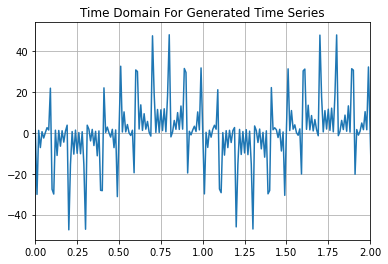

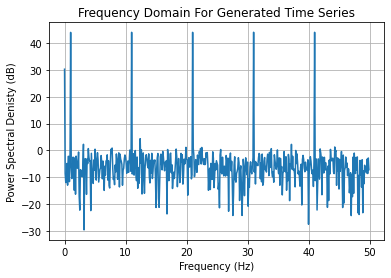

You can the following functions:
High pass: Applies a customized High Pass Frequnecy filter to this series
Low pass: Applies a customized Low Pass Frequnecy filter to this series
Band pass: Applies a customized Band Pass Frequnecy filter to this series
Reset: Restores a saved filtered series to the original series
Finish: Ends the Iteration and resets the input
What Process would you like to do?High Pass
what is the cutoff frequnecy for this High-pass fitler30


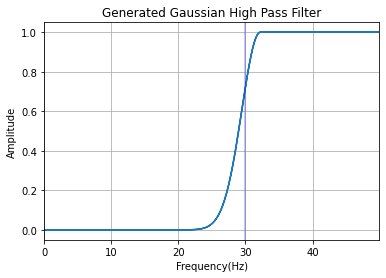

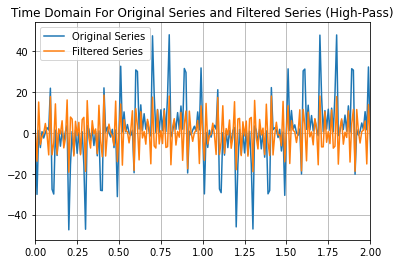

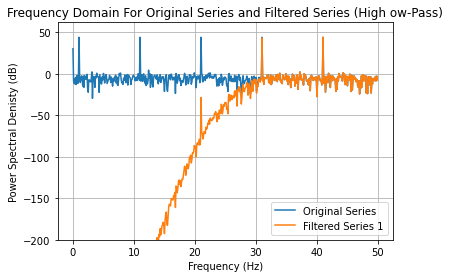

What Process would you like to do?low pass
what is the cutoff frequnecy for this Low-pass fitler40


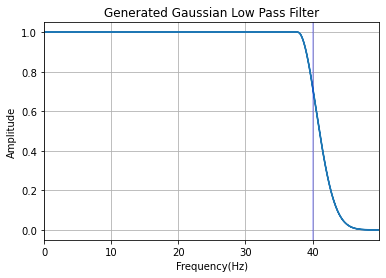

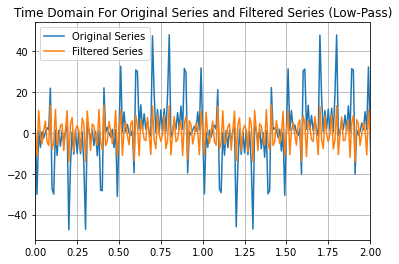

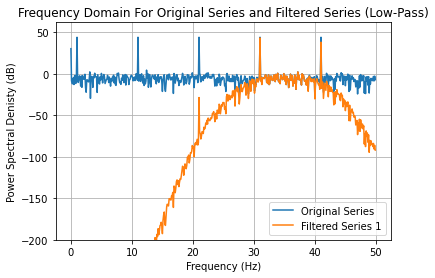

What Process would you like to do?reset
What Process would you like to do?show


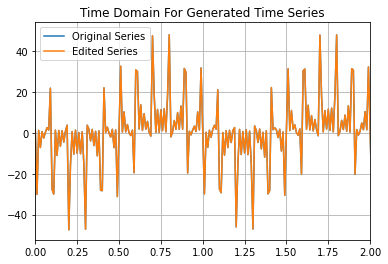

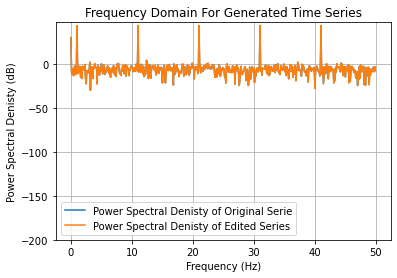

What Process would you like to do?finish


In [4]:
print('The Time series has been Developed with the Above Parameters')
print('This Time series can be represented in the time and Frequency Domain: ')

F = np.fft.fftfreq(len(t), d = float(SampF))
n = len(F)

Assemble_Series = Series

plt.plot(t, Series)
plt.title('Time Domain For Generated Time Series')
plt.xlim(t0Val,200*SampFVal)
plt.grid()
plt.show()



plt.plot(F[:n//2],PSD(Series)[:n//2])
plt.title('Frequency Domain For Generated Time Series')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Denisty (dB)')
plt.grid()
plt.show()

print('You can the following functions:')
print('High pass: Applies a customized High Pass Frequnecy filter to this series')
print('Low pass: Applies a customized Low Pass Frequnecy filter to this series')
print('Band pass: Applies a customized Band Pass Frequnecy filter to this series')
print('Reset: Restores a saved filtered series to the original series')
print('Finish: Ends the Iteration and resets the input')

N = Series
filter_flag = True 


while filter_flag == True: 

    filter_input = input('What Process would you like to do?')
    filter_input = filter_input.capitalize()
    filter_input = filter_input.strip()
    
    if filter_input == 'High pass':
        flag_high = True
        cutoff_high = input('what is the cutoff frequnecy for this High-pass fitler')

        while flag_high == True:
            if intcheck(cutoff_high) == True or floatcheck(cutoff_high) == True:
                flag_high = False
                break 
            else:
                print('Error Invalid Input, Please input a valid Numeric entry')
                cutoff_high = input('what is the cutoff frequnecy for this High-pass fitler')
                break
        
        filter_highpass = np.zeros_like(F)
        cutoff_high = float(cutoff_high)
        
        for i in range(n):
            if np.abs(F[i]) - 2.2 < cutoff_high:
                filter_highpass[i] = np.exp(-1/15*(np.abs(F[i]) - float(cutoff_high) - 2.2)**2) 
            else: 
                filter_highpass[i] = 1 

        
        Filtered_Signal_frequney = np.fft.fft(Assemble_Series)*filter_highpass
        Filtered_Signal_time = np.fft.ifft(Filtered_Signal_frequney)
        Filtered_Signal = np.real(Filtered_Signal_time)
        Assemble_Series = Filtered_Signal
        
        plt.plot(np.abs(F),np.abs(filter_highpass))
        plt.xlabel('Frequency(Hz)')
        plt.ylabel('Amplitude')
        plt.axvline(x = float(cutoff_high), color = 'blue',alpha = 0.3,label = 'Cutoff Frequnecy')
        plt.xlim(0,np.max(F))
        plt.title('Generated Gaussian High Pass Filter')
        plt.grid()
        plt.show()
        
        plt.plot(t, Series, label='Original Series')
        plt.plot(t, Filtered_Signal, label='Filtered Series')
        plt.title('Time Domain For Original Series and Filtered Series (High-Pass)' ) 
        plt.xlim(t0Val,200*SampFVal)
        plt.legend()
        plt.grid()
        plt.show()

        plt.plot(F[:n//2],PSD(Series)[:n//2], label='Original Series')
        plt.plot(F[:n//2],PSD(Filtered_Signal)[:n//2],  label='Filtered Series 1')
        plt.title('Frequency Domain For Original Series and Filtered Series (High ow-Pass)' )
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Denisty (dB)')
        plt.ylim(bottom=-200)
        plt.grid()
        plt.legend()
        plt.show()
        
        filter_input = input('What Process would you like to do?')
        filter_input = filter_input.capitalize()
        filter_input = filter_input.strip()
        
        
    if filter_input == 'Low pass':
        flag_lower = True
        cutoff_lower = input('what is the cutoff frequnecy for this Low-pass fitler')
        
        while flag_lower == True:
            if intcheck(cutoff_lower) == True or floatcheck(cutoff_lower) == True:
                flag_lower = False
                break 
            else:
                print('Error Invalid Input, Please input a valid Numeric entry')
                cutoff_lower = input('what is the cutoff frequnecy for this Low-pass fitler')
                break
        
        filter_lowpass = np.zeros_like(Series)
        cutoff_lower = float(cutoff_lower)
        for i in range(n):
            if abs(F[i]) > float(cutoff_lower) -2.2:
                filter_lowpass[i] = np.exp(-1/15*(np.abs(F[i]) - float(cutoff_lower)+2.2)**2)
            else: 
                filter_lowpass[i] = 1
        
        Filtered_Signal_frequney = np.fft.fft(Assemble_Series)*filter_lowpass
        
        Filtered_Signal_time = np.fft.ifft(Filtered_Signal_frequney)
        Filtered_Signal = np.real(Filtered_Signal_time)
        Assemble_Series = Filtered_Signal
        
        plt.plot(np.abs(F),np.abs(filter_lowpass))
        plt.xlabel('Frequency(Hz)')
        plt.ylabel('Amplitude')
        plt.axvline(x = float(cutoff_lower), color = 'blue',alpha = 0.3,label = 'Cutoff Frequnecy')
        plt.xlim(0,np.max(F))
        plt.title('Generated Gaussian Low Pass Filter')
        plt.grid()
        plt.show()

        plt.plot(t, Series, label='Original Series')
        plt.plot(t, Filtered_Signal, label='Filtered Series')
        plt.title('Time Domain For Original Series and Filtered Series (Low-Pass)' ) 
        plt.xlim(t0Val,200*SampFVal)
        plt.legend()
        plt.grid()
        plt.show()

        plt.plot(F[:n//2],PSD(Series)[:n//2], label='Original Series')
        plt.plot(F[:n//2],PSD(Filtered_Signal)[:n//2], label='Filtered Series 1')
        plt.title('Frequency Domain For Original Series and Filtered Series (Low-Pass)' )
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Denisty (dB)')
        plt.ylim(bottom=-200)
        plt.legend()
        plt.grid()
        plt.show()
        
        filter_input = input('What Process would you like to do?')
        filter_input = filter_input.capitalize()
        filter_input = filter_input.strip()
        
    if filter_input == 'Band pass':
        flag_lower = True
        cutoff_lower = input('what is the cutoff frequnecy for lower bound of this fitler')
        
        while flag_lower == True:
            if intcheck(cutoff_lower) == True or floatcheck(cutoff_lower) == True:
                flag_lower = False
                break 
            else:
                print('Error Invalid Input, Please input a valid Numeric entry')
                cutoff_lower = input('what is the cutoff frequnecy for lower bound of this fitler')
                break
        
        flag_upper = True
        cutoff_upper = input('what is the cutoff frequnecy for upper bound of this fitler')
        
        while flag_upper == True:
            if intcheck(cutoff_upper) == True or floatcheck(cutoff_upper) == True:
                flag_upper = False
                break 
            else:
                print('Error Invalid Input, Please input a valid Numeric entry')
                cutoff_upper = input('what is the cutoff frequnecy for upper bound of this fitler')
                break
        
        filter_bandpass = np.ones_like(Series)
        cutoff_lower = float(cutoff_lower)
        cutoff_upper = float(cutoff_upper)
        for i in range(n):
            if abs(F[i]) >= cutoff_lower -2.2 and abs(F[i]) < cutoff_upper - 0.8 :
                filter_bandpass[i] = np.exp(-1/15*(np.abs(F[i]) - cutoff_lower+2.2)**2)
            
            if abs(F[i]) >= cutoff_upper -6.8  and abs(F[i]) <= cutoff_upper + 2.2: 
                filter_bandpass[i] = np.exp(-1/15*(np.abs(F[i]) - cutoff_upper - 2.2)**2)
            
        Filtered_Signal_frequney = np.fft.fft(Assemble_Series)*filter_bandpass
        
        Filtered_Signal_time = np.fft.ifft(Filtered_Signal_frequney)
        Filtered_Signal = np.real(Filtered_Signal_time)
        Assemble_Series = Filtered_Signal
        
        plt.plot(np.abs(F),np.abs(filter_bandpass))
        plt.xlabel('Frequency(Hz)')
        plt.ylabel('Amplitude')
        plt.axvline(x = float(cutoff_lower), color = 'blue',alpha = 0.3,label = 'High Cutoff Frequnecy')
        plt.axvline(x = float(cutoff_upper), color = 'blue',alpha = 0.3,label = 'Low Cutoff Frequnecy')
        plt.xlim(0,np.max(F))
        plt.title('Generated Gaussian Low Pass Filter')
        plt.grid()
        plt.show()

        plt.plot(t, Series, label='Original Series')
        plt.plot(t, Filtered_Signal, label='Filtered Series')
        plt.title('Time Domain For Original Series and Filtered Series (Band-Pass)' ) 
        plt.xlim(t0Val,200*SampFVal)
        plt.legend()
        plt.grid()
        plt.show()

        plt.plot(F[:n//2],PSD(Series)[:n//2],label='Original Series')
        plt.plot(F[:n//2],PSD(Filtered_Signal)[:n//2], label='Filtered Series 1')
        plt.title('Frequency Domain For Original Series and Filtered Series (Low-Pass)' )
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Denisty (dB)')
        plt.ylim(bottom=-200)
        plt.legend()
        plt.grid()
        plt.show()
        
        filter_input = input('What Process would you like to do?')
        filter_input = filter_input.capitalize()
        filter_input = filter_input.strip()

    if filter_input == 'Reset':
        Assemble_Series = Series
        
        filter_input = input('What Process would you like to do?')
        filter_input = filter_input.capitalize()
        filter_input = filter_input.strip()
    
    if filter_input == 'Show':
        plt.plot(t, Series, label = 'Original Series')
        plt.plot(t,Assemble_Series, label = 'Edited Series' )
        plt.title('Time Domain For Generated Time Series')
        plt.xlim(t0Val,200*SampFVal)
        plt.grid()
        plt.legend()
        plt.show()



        plt.plot(F[:n//2],PSD(Series)[:n//2], label ='Power Spectral Denisty of Original Serie')
        plt.plot(F[:n//2],PSD(Assemble_Series)[:n//2], label ='Power Spectral Denisty of Edited Series')
        plt.title('Frequency Domain For Generated Time Series')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power Spectral Denisty (dB)')
        plt.ylim(bottom = -200)
        plt.grid()
        plt.legend()
        plt.show()
        
        filter_input = input('What Process would you like to do?')
        filter_input = filter_input.capitalize()
        filter_input = filter_input.strip()
        
    if filter_input == 'Finish':
        filter_flag = False 
        break 
    else: 
        print('Invalid entry ')